# Model comparisons - 01 Katz et al. (2003)
This notebook compares the calculation results from pyMelt to the figures published in the Katz et al. (2003) manuscript.

Import required packages:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pyMelt as m

## Figure 1 - solidus and liquidus
Calculate liquidus and solidus:

In [2]:
katz = m.lithologies.katz.lherzolite()
p = np.linspace(0, 8, 100)
sol = katz.TSolidus(p)
liq = katz.TLiquidus(p)
lzliq = katz._TLherzLiquidus(p)

Add on top of the figure from Katz:

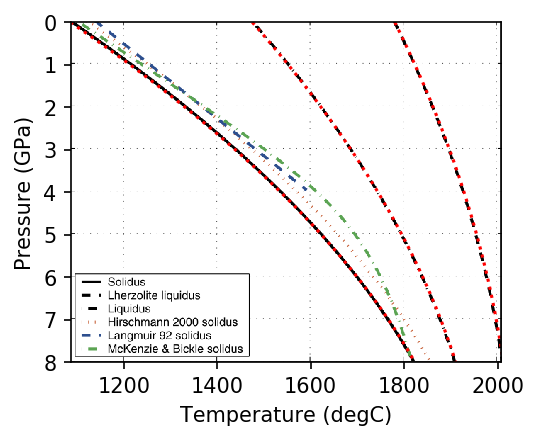

In [3]:
f, a = plt.subplots(figsize=(3.7,3), dpi=150)

pub = plt.imread('figures/katz_fig1.png')

a.set_xlim(1087.6,2008)
a.set_ylim(8,0)

a.imshow(pub, 
         extent=[a.get_xlim()[0], a.get_xlim()[1], 
                 a.get_ylim()[0], a.get_ylim()[1]], 
         aspect='auto')

a.plot(sol, p, c='r', ls=':')
a.plot(liq, p, c='r', ls=':')
a.plot(lzliq, p, c='r', ls=':')

a.set_ylabel('Pressure (GPa)')
a.set_xlabel('Temperature (degC)')

plt.show()

## Figure 2 - Isobaric Melt Fractions

Calculate melt fractions:

In [4]:
t = np.linspace(1000, 2000, 100)
F = np.zeros([4, 100])

for i in range(len(t)):
    F[0, i] = katz.F(0, t[i])
    F[1, i] = katz.F(1, t[i])
    F[2, i] = katz.F(2, t[i])
    F[3, i] = katz.F(3, t[i])

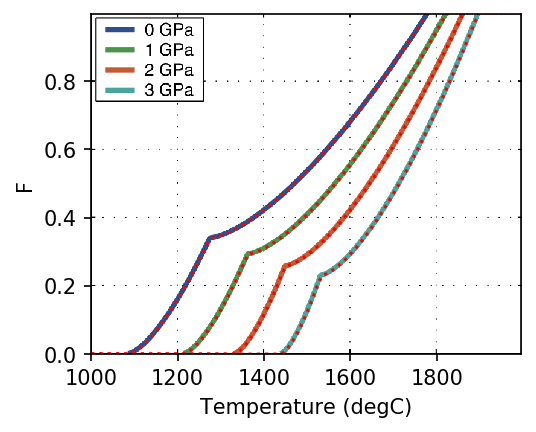

In [5]:
f, a = plt.subplots(figsize=(3.7,3), dpi=150)

pub = plt.imread('figures/katz_fig2.png')

a.set_xlim(1000, 1995.45)
a.set_ylim(0, 0.995)

a.imshow(pub, 
         extent=[a.get_xlim()[0], a.get_xlim()[1], 
                 a.get_ylim()[0], a.get_ylim()[1]], 
         aspect='auto')

a.plot(t, F[0, :], c='r', ls=':')
a.plot(t, F[1, :], c='r', ls=':')
a.plot(t, F[2, :], c='r', ls=':')
a.plot(t, F[3, :], c='r', ls=':')

a.set_xlabel('Temperature (degC)')
a.set_ylabel('F')

plt.show()

## Figure 3 - Hydrous pseudo-phase diagram
Calculate hydrous solidii:

In [41]:
p = np.linspace(0, 8, 100)

katz_sat = m.hydrousLithology(katz, 100.0)
katz_03 = m.hydrousLithology(katz, 0.3)
katz_01 = m.hydrousLithology(katz, 0.1)
katz_005 = m.hydrousLithology(katz, 0.05)
katz_002 = m.hydrousLithology(katz, 0.02)

s_sat = np.zeros(np.shape(p))
s_03 = np.zeros(np.shape(p))
s_01 = np.zeros(np.shape(p))
s_005 = np.zeros(np.shape(p))

for i in range(len(p)):
    s_sat[i] = katz_sat.TSolidus(p[i])
    s_03[i] = katz_03.TSolidus(p[i])
    s_01[i] = katz_01.TSolidus(p[i])
    s_005[i] = katz_005.TSolidus(p[i])


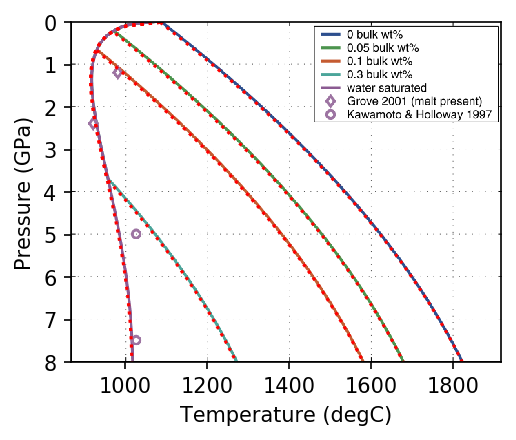

In [42]:
f, a = plt.subplots(figsize=(3.7,3), dpi=150)

pub = plt.imread('figures/katz_fig3.png')

a.set_xlim(869,1918)
a.set_ylim(8,0)

a.imshow(pub, 
         extent=[a.get_xlim()[0], a.get_xlim()[1], 
                 a.get_ylim()[0], a.get_ylim()[1]], 
         aspect='auto')

a.plot(sol, p, c='r', ls=':')
a.plot(s_sat, p, c='r', ls=':')
a.plot(s_03, p, c='r', ls=':')
a.plot(s_01, p, c='r', ls=':')
a.plot(s_005, p, c='r', ls=':')

a.set_ylabel('Pressure (GPa)')
a.set_xlabel('Temperature (degC)')

plt.show()

## Figure 4 - Isobaric hydrous melting
Calculate melt fractions:

In [43]:
t = np.linspace(900, 1400, 100)
F = np.zeros([5, 100])

for i in range(len(t)):
    F[0, i] = katz.F(1.0, t[i])
    F[1, i] = katz_03.F(1.0, t[i])
    F[2, i] = katz_01.F(1.0, t[i])
    F[3, i] = katz_005.F(1.0, t[i])
    F[4, i] = katz_002.F(1.0, t[i])

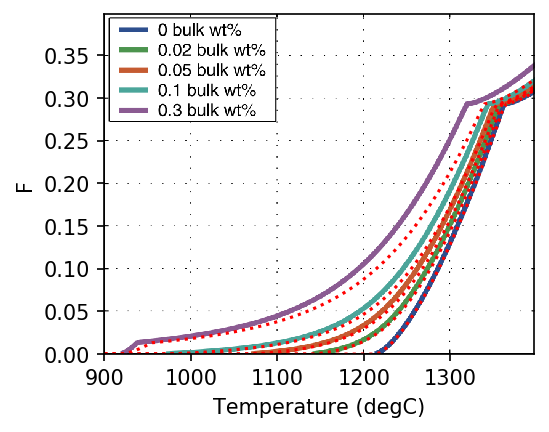

In [44]:
f, a = plt.subplots(figsize=(3.7,3), dpi=150)

pub = plt.imread('figures/katz_fig4.png')

a.set_xlim(900,1397)
a.set_ylim(0,0.398)

a.imshow(pub, 
         extent=[a.get_xlim()[0], a.get_xlim()[1], 
                 a.get_ylim()[0], a.get_ylim()[1]], 
         aspect='auto')

a.plot(t, F[0], c='r', ls=':')
a.plot(t, F[1], c='r', ls=':')
a.plot(t, F[2], c='r', ls=':')
a.plot(t, F[3], c='r', ls=':')
a.plot(t, F[4], c='r', ls=':')

a.set_ylabel('F')
a.set_xlabel('Temperature (degC)')

plt.show()

## Figure 5 - isobaric isothermal hydrous melting

In [45]:
hlo = np.linspace(0, 0.25, 26)

Flo = np.zeros([4, np.shape(hlo)[0]])
hm = np.zeros([4, np.shape(hlo)[0]])

t = [1200, 1250, 1300, 1350]

for i in range(len(hlo)):
    hkatz = m.hydrousLithology(katz, hlo[i])
    for j in range(len(t)):
        Flo[j, i] = hkatz.F(1.5, t[j])
        hm[j, i] = hkatz.melt_H2O(Flo[j, i], 1.5)


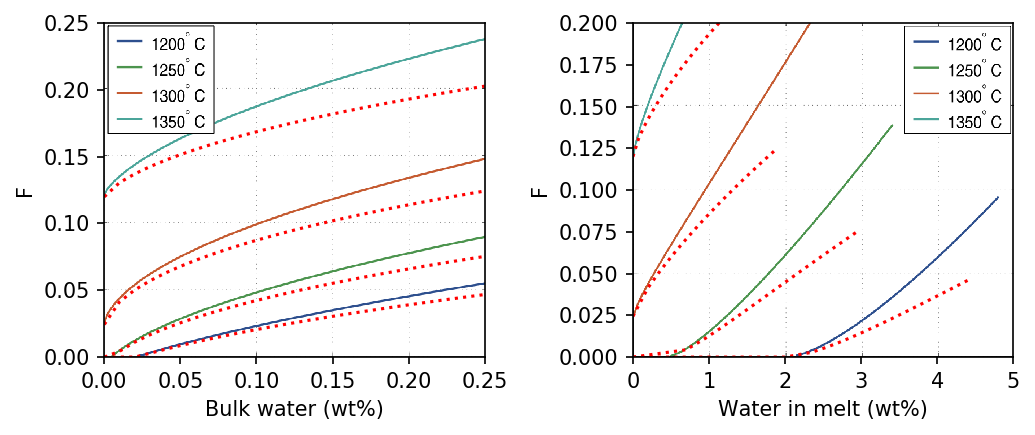

In [50]:
f, a = plt.subplots(1, 2, figsize=(7,3), dpi=150)

pub = plt.imread('figures/katz_fig5a.png')

a[0].set_xlim(0, 0.25)
a[0].set_ylim(0, 0.25)

a[0].imshow(pub, 
            extent=[a[0].get_xlim()[0], a[0].get_xlim()[1], 
                    a[0].get_ylim()[0], a[0].get_ylim()[1]], 
            aspect='auto')

for j in range(len(t)):
    a[0].plot(hlo, Flo[j,:], c='r', ls=':')

a[0].set_xlabel('Bulk water (wt%)')
a[0].set_ylabel('F')
    
    
pub = plt.imread('figures/katz_fig5b.png')

a[1].set_xlim(0, 5)
a[1].set_ylim(0, 0.2)

a[1].imshow(pub, 
            extent=[a[1].get_xlim()[0], a[1].get_xlim()[1], 
                    a[1].get_ylim()[0], a[1].get_ylim()[1]], 
            aspect='auto')

for j in range(len(t)):
    a[1].plot(hm[j,:], Flo[j,:], c='r', ls=':')

a[1].set_xlabel('Water in melt (wt%)')
a[1].set_ylabel('F')
    
f.tight_layout()
    
plt.show()

## Figure 11 - Isentropes

In [11]:
Mcpx = 0.1
h2o = [0.0, 200/1e4]
tp = [1250, 1350, 1450]

params = katz.parameters
params['Mcpx'] = Mcpx
katz.parameters = params

results = []

for i in range(len(h2o)):
    res = []
    if h2o[i] > 0:
        lith = m.hydrousLithology(katz, h2o[i])
    else:
        lith = katz
    
    mantle = m.mantle([lith], [1.0])
    
    for j in range(len(tp)):
        res.append(mantle.adiabaticMelt(tp[j], dP=-0.001))#, Pstart=6.0))
    
    results.append(res)

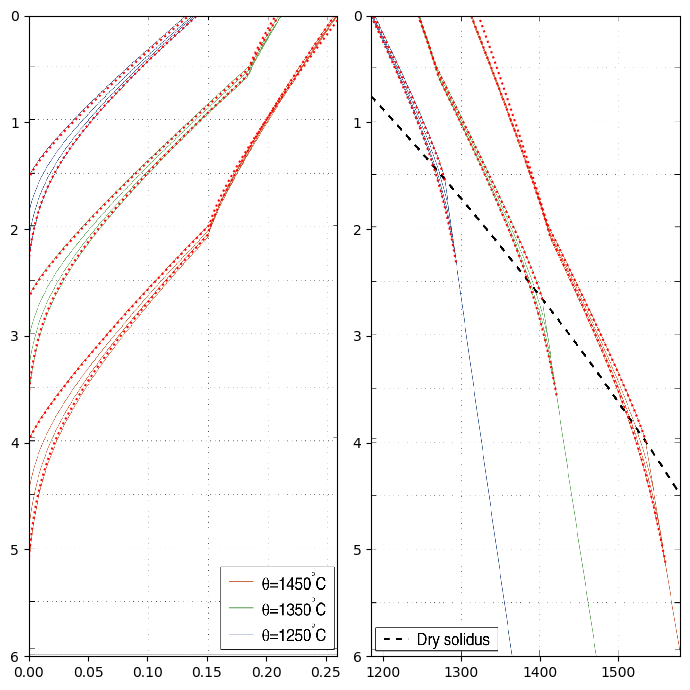

In [12]:
f, a = plt.subplots(1, 2, figsize=(7,7), dpi=100)

pub = plt.imread('figures/katz_fig11a.png')

a[0].set_xlim(0, 0.26)
a[0].set_ylim(6, 0)

a[0].imshow(pub, 
            extent=[a[0].get_xlim()[0], a[0].get_xlim()[1], 
                    a[0].get_ylim()[0], a[0].get_ylim()[1]], 
            aspect='auto')



# a[0].set_xlabel('Bulk water (wt%)')
# a[0].set_ylabel('F')
    
    
pub = plt.imread('figures/katz_fig11b.png')

a[1].set_xlim(1185, 1579)
a[1].set_ylim(6.0, 0)

a[1].imshow(pub, 
            extent=[a[1].get_xlim()[0], a[1].get_xlim()[1], 
                    a[1].get_ylim()[0], a[1].get_ylim()[1]], 
            aspect='auto')



# a[1].set_xlabel('Water in melt (wt%)')
# a[1].set_ylabel('F')

for i in range(len(h2o)):
    for j in range(len(tp)):
#         if i == 0:
        a[0].plot(results[i][j].F, results[i][j].P, c='r', ls=':')
        a[1].plot(results[i][j].T, results[i][j].P, c='r', ls=':')
    
f.tight_layout()
    
plt.show()